In [1]:
from rdkit import Chem

workdir = '/mnt/e/DesignData/Chemodrugs/HB_RUC_uaa/'
uaa_rd = Chem.MolFromPDBFile(workdir + 'AzoPhe.pdb')


object_methods = [method_name for method_name in dir(uaa_rd)
     if callable(getattr(uaa_rd, method_name))]

print(object_methods)

['AddConformer', 'ClearComputedProps', 'ClearProp', 'Debug', 'GetAromaticAtoms', 'GetAtomWithIdx', 'GetAtoms', 'GetAtomsMatchingQuery', 'GetBondBetweenAtoms', 'GetBondWithIdx', 'GetBonds', 'GetBoolProp', 'GetConformer', 'GetConformers', 'GetDoubleProp', 'GetIntProp', 'GetNumAtoms', 'GetNumBonds', 'GetNumConformers', 'GetNumHeavyAtoms', 'GetProp', 'GetPropNames', 'GetPropsAsDict', 'GetRingInfo', 'GetStereoGroups', 'GetSubstructMatch', 'GetSubstructMatches', 'GetUnsignedProp', 'HasProp', 'HasSubstructMatch', 'NeedsUpdatePropertyCache', 'RemoveAllConformers', 'RemoveConformer', 'SetBoolProp', 'SetDoubleProp', 'SetIntProp', 'SetProp', 'SetUnsignedProp', 'ToBinary', 'UpdatePropertyCache', '__DebugMol', '__GetSubstructMatch', '__GetSubstructMatches', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getinitargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce

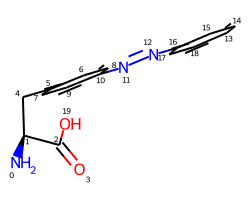

In [2]:
from rdkit.Chem.Draw import rdMolDraw2D
d = rdMolDraw2D.MolDraw2DCairo(250, 200) # or MolDraw2DSVG to get SVGs

d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(uaa_rd)
d.FinishDrawing()
d.WriteDrawingText(workdir + 'uaa_atom_annotation.png')  

from IPython.display import Image
Image(filename=workdir + 'uaa_atom_annotation.png')

In [10]:
for atom in uaa_rd.GetAtoms():
    print((atom.GetPDBResidueInfo().GetName(), atom.GetIdx()))


(' N  ', 0)
(' CA ', 1)
(' C  ', 2)
(' O  ', 3)
(' CB ', 4)
(' CG ', 5)
(' CD1', 6)
(' CD2', 7)
(' CE1', 8)
(' CE2', 9)
(' CZ ', 10)
(' N1 ', 11)
(' N2 ', 12)
(' C1 ', 13)
(' C2 ', 14)
(' C3 ', 15)
(' C4 ', 16)
(' C5 ', 17)
(' C6 ', 18)
(' O1 ', 19)


In [16]:
uc = uaa_rd.GetConformer()

import rdkit.Chem.rdMolTransforms as rmt
rmt.GetAngleDeg(uc, 1,2, 3)

rmt.SetAngleDeg(uc, 1,2, 3, 60)

In [19]:
from rdkit.Chem.rdmolfiles import MolToPDBFile 
MolToPDBFile(uaa_rd, workdir + 'test.pdb')